In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

Ground state energy:  -0.46046587969271546
1st excited state energy:  0.09742471331761056
2nd excited state energy:  1.9717331343930202


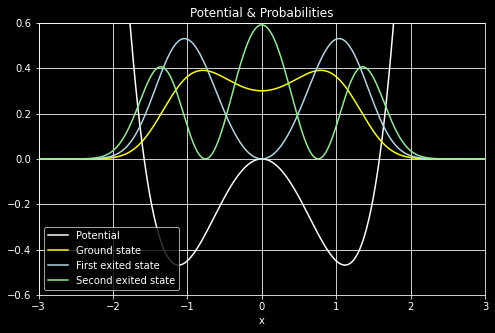

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="white", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2 , label = "Ground state",color='yellow')
plt.plot(x,(psi[1])**2 , label = "First exited state", color='lightblue')
plt.plot(x,(psi[2])**2 , label = "Second exited state", color='lightgreen')
plt.legend(loc="best")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

In [6]:
mu , sigma = np.loadtxt( "Parameters.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)
energy , error_ene = np.loadtxt( "data.csv" , dtype=float , delimiter = ",", usecols=(0,1) , unpack= True)
Z = np.loadtxt( "Energies.csv" , dtype=float , usecols=(0) , unpack= True ) #energie stimate con i diversi parametri

In [8]:
mu_min = mu[np.argmin(Z)] 
sigma_min = sigma[np.argmin(Z)]
print ("The parameters that minimise the energy are: mu = " + str(mu_min) + " , sigma = " + str(sigma_min) )
print("The estimate of the calculated energy with these parameters is " , energy[-1] )

The parameters that minimise the energy are: mu = 0.811431 , sigma = 0.616117
The estimate of the calculated energy with these parameters is  -0.440914


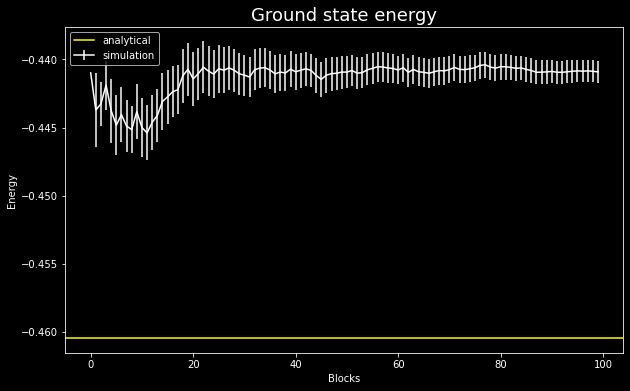

In [16]:
plt.figure(figsize=(10,6))
plt.errorbar( np.arange(len(energy)) , energy , yerr=error_ene , color='white' ,label='simulation')
plt.axhline(E[0], label='analytical', color='yellow')
plt.title("Ground state energy" , fontsize= 18)
plt.xlabel("Blocks")
plt.ylabel("Energy")
plt.legend(loc='upper left')
#plt.grid()

The graph depicts the energy trend of the ground state as a function of the number of blocks. In total, the wave function samples taken to estimate the energy are $ 10 ^ 6 $, which have been divided into 100 blocks. Each block therefore contains $10000$ measurements. When sampling $ |\psi(x)|^2$, I chose the starting point by generating it stochastically in the interval $(-0.5, 0.5)$.
The energy is higher than the expected value calculated analytically, which I actually expect from an estimate based on a variational method, which therefore only places a limit from above on the energy of the ground state.
In particular, the plot shows the average energy for the fitted parameters. The final energy estimate is $-0.4441$.

In [17]:
#Carico i dati per l'istogramma che mostra il campionamento della funzione d'onda
my_psi = np.loadtxt( "psi.csv" , dtype=float , usecols=(0) , unpack= True)

In [18]:
#Definisco la funzione d'onda attesa, che valuterò con i parametri migliori
def psi_exact(x , mu , sigma ):
    return (np.exp(-(x-mu)**2/(2*sigma**2)) + np.exp(-(x+mu)**2/(2*sigma**2)))/(2*sigma*np.sqrt(2*np.pi))

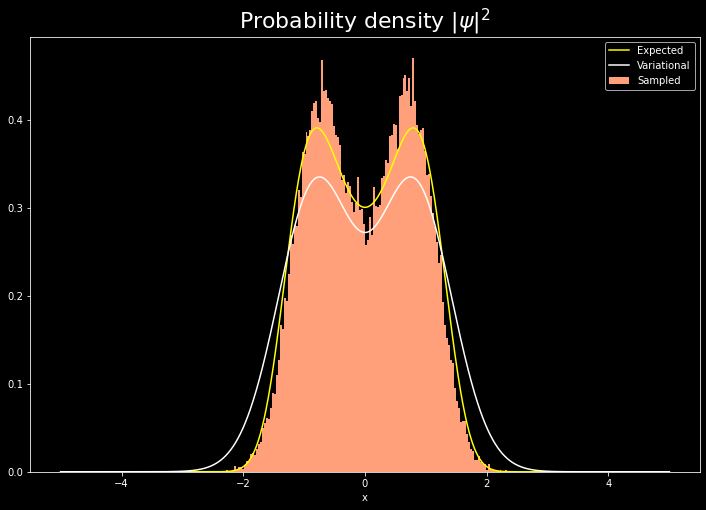

In [25]:
fig , ax = plt.subplots(1, 1 , figsize=(12,8)) 
ax.hist( my_psi, bins=150 , density=True, label='Sampled' , color= "lightsalmon" , lw=0)
ax.plot(x, (psi[0])**2 , label = "Expected" , color= "#FFFF00")
ax.plot( x , psi_exact(x , mu_min , sigma_min ) , label = "Variational" , color = "white" )
ax.set_title(r"Probability density $|\psi|^2$" , fontsize = 22)
ax.set_xlabel("x")
ax.legend(loc="best")

<ipython-input-29-ef3582b89f40>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


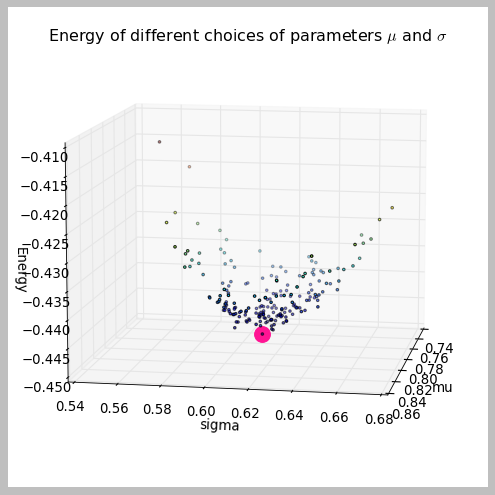

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(mu, sigma, Z, c=Z, marker='.')
ax.scatter( mu_min , sigma_min , Z[np.argmin(Z)] , color = "deeppink" , marker = "o" , s=200  )
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('Energy')
ax.set_title( r'Energy of different choices of parameters $\mu$ and $\sigma$' )
ax.view_init(10, 10)
fig.add_axes(ax)
auto_add_to_figure=False
plt.style.use("classic")
plt.show()